In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
features = pd.read_csv('data.csv')
features = features.drop('Serial No.', axis=1)

In [3]:
ohe = preprocessing.OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(features[['IELTS Score','PTE Score','TOEFEL Score','Backlogs','CGPA','Work Experience','Paper Level']]).toarray()
feature_labels = ohe.categories_

In [4]:
labels = np.array(features['Score'])
features= features.drop('Score', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [5]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (450, 7)
Training Labels Shape: (450,)
Testing Features Shape: (150, 7)
Testing Labels Shape: (150,)


In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(test_labels.reshape(1,-1))
test_labels = imp.transform(test_labels.reshape(1,-1))

In [8]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [9]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
print(np.mean(mape))
# Calculate and display accuracy
np.seterr(divide='ignore', invalid='ignore')
accuracy = 100 - np.mean(mape)
print(accuracy)
print('Accuracy:', round(accuracy, 2), '%.')

5.357026373399905
94.6429736266001
Accuracy: 94.64 %.


In [11]:
# save the model to disk
filename = 'trainedModel.sav'
pickle.dump(rf, open(filename, 'wb'))

In [12]:
# test2 = [[8,0,0,0,8,12,3]]

In [13]:
# rf.predict(test2)

In [16]:
features3 = pd.read_csv('data.csv')

In [17]:
features3

,Serial No.,IELTS Score,PTE Score,TOEFEL Score,Backlogs,CGPA,Work Experience,Paper Level,Score
0,1,9.0,0,0,0,9.65,0,2,0.99
1,2,8.5,0,0,0,8.87,1,1,0.99
2,3,8.0,0,0,2,8.00,2,0,0.92
3,4,7.5,0,0,1,8.67,3,0,0.96
4,5,7.0,0,0,1,8.21,4,0,0.87
...,...,...,...,...,...,...,...,...,...
595,596,0.0,0,93,0,9.70,5,2,0.99
596,597,0.0,0,95,1,8.40,0,0,0.82
597,598,0.0,0,74,12,5.60,0,1,0.35
598,599,0.0,0,73,4,7.05,0,2,0.69


In [57]:
features2 = pd.read_csv('data.csv')
features2 = features2.drop('Serial No.', axis=1)

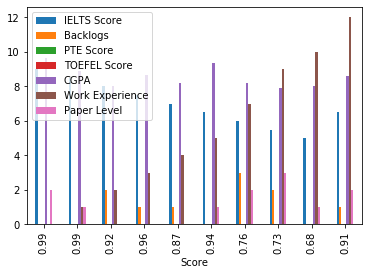

In [60]:
features2 = features2.head(10)
features2.plot(x='Score', y=['IELTS Score', 'Backlogs', 'PTE Score', 'TOEFEL Score', 'CGPA', 'Work Experience', 'Paper Level'], kind="bar")